In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

0 0.22005959
200 0.0060607935
400 0.0005832303
600 0.0004483794
800 0.0004203619
1000 0.00041410915
1200 0.0004122843
1400 0.0004113906
1600 0.00041071943
1800 0.0004101221
2000 0.00040956467


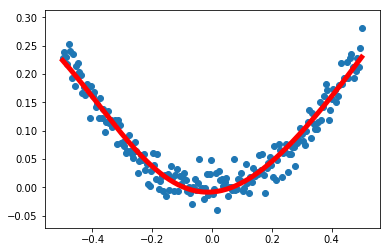

In [4]:
#using numpy to create 200 nodes
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#define two placeholder
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

#define the middle layer of neural network
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#define the output layer of nerual network
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#quadratic cost function
loss = tf.reduce_mean(tf.square(y-prediction))
#training with gradient descent
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(2001):
        sess.run(train_step, feed_dict={x:x_data,y:y_data})
        if step%200==0:
            print(step, sess.run(loss, feed_dict={x:x_data,y:y_data}))
            
    #retrieve prediction values using matplot
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()